# Churn Prediction Model

## Objectives

In this Jupyter Notebook, we will focus on-
1. Predict whether or not a customer will churn based on certain information given.
2. Compare multiple learning algorithms to identify the best-performing model.
3. Identify the key factors that influence customer churn.
4. Determine the algorithm with the highest accuracy for predicting churn.

## Deep Learning Algorithms used-
We will be using four learning algorithms:

1. Deep Neural Network
2. Recurrent Neural Netowrk-RNN
3. Convolutional Neural Network
4. Transformer Model

### Exploratory Data Analysis

#### 1. Importing Python Libraries
Initially we import all the essential Python libraries required during the implementation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#### 2. Loading the Dataset

In [4]:
df=pd.read_csv('C:/Users/riddh/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
#Displaying the dataset
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
#the first five rows of the dataset 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Displays the number of rows and columns in the datatset
df.shape

(7043, 21)

In [8]:
#Displays the column names of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#Describe the statistical characteristics of numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#Displays the summary of a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Preprocessing
#### 3. Checking Missing Values

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Null Values Present.

#### 4 . Remove Irrelevant Columns

In [15]:
# Assuming 'customerID' is not needed for analysis
df.drop('customerID', axis=1, inplace=True)

#### 5. Encoding Categorical Variables
Sometimes, datasets came up with non numerical values and it is impossible to give it to any classifier. So our job is to convert non numeric values to numerical ones.

In [17]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
# Label encoding for binary categories
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [19]:
# One-hot encoding for nominal categories
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [20]:
# Convert 'TotalCharges' from object to numeric and handle missing/incorrect values
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

C:\Users\riddh\AppData\Local\Temp\ipykernel_21204\2138430837.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [21]:
df.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

#### 6. Binning 'tenure' into Categorical Bins

In [23]:
bins = [0, 12, 24, 60, 120]
labels = ['0-1 year', '1-2 years', '2-5 years', '5+ years']
df['tenure_bins'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

#### 7. Normalization
Normalization is needed to ensure all features contribute equally to the model by scaling them to a similar range, improving algorithm performance and convergence speed.

In [25]:
df.dtypes

gender                                      int32
SeniorCitizen                               int64
Partner                                     int64
Dependents                                  int64
tenure                                      int64
PhoneService                                int64
PaperlessBilling                            int64
MonthlyCharges                            float64
TotalCharges                              float64
Churn                                       int64
MultipleLines_No phone service               bool
MultipleLines_Yes                            bool
InternetService_Fiber optic                  bool
InternetService_No                           bool
OnlineSecurity_No internet service           bool
OnlineSecurity_Yes                           bool
OnlineBackup_No internet service             bool
OnlineBackup_Yes                             bool
DeviceProtection_No internet service         bool
DeviceProtection_Yes                         bool


In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bins
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,True,False,0-1 year
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,True,False,False,False,True,2-5 years
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,True,0-1 year
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,False,True,False,False,False,False,2-5 years
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,True,False,0-1 year


In [27]:
# Standardizing numeric features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bins
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994971,0,...,False,False,False,False,False,False,False,True,False,0-1 year
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173876,0,...,False,False,False,False,True,False,False,False,True,2-5 years
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.960399,1,...,False,False,False,False,False,False,False,False,True,0-1 year
3,1,0,0,0,0.514251,0,0,-0.746535,-0.195400,0,...,False,False,False,False,True,False,False,False,False,2-5 years
4,0,0,0,0,-1.236724,1,1,0.197365,-0.941193,1,...,False,False,False,False,False,False,False,True,False,0-1 year


### Feature Engineering
#### 8. Create Interaction Terms
Interaction terms are created to capture combined effects of features, revealing relationships that individual features alone might not show, thus enhancing model performance.

In [30]:
# Interaction between 'tenure' and 'MonthlyCharges'
df['tenure_monthlycharges_interaction'] = df['tenure'] * df['MonthlyCharges']

# Interaction between 'tenure' and 'TotalCharges'
df['tenure_totalcharges_interaction'] = df['tenure'] * df['TotalCharges']

#### 9. Polynomial Features
Polynomial features are used to capture and model complex relationships between variables by creating additional features based on combinations and powers of the original features. This can enhance the model’s ability to fit the data by allowing it to learn non-linear relationships.

Here’s why polynomial features are beneficial:

1. Capture Non-Linear Relationships: Polynomial features can model non-linear interactions between features, which linear models alone might miss.

2. Improve Model Flexibility: By adding higher-order terms, the model gains the flexibility to fit more complex patterns in the data.

3. Enhance Predictive Power: Including polynomial features can potentially improve the model’s accuracy by allowing it to better capture the underlying relationships in the data.

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=False)
features = df[['tenure', 'MonthlyCharges']]
poly_features = poly.fit_transform(features)
poly_feature_names = poly.get_feature_names_out(['tenure', 'MonthlyCharges'])

# Create a DataFrame from the polynomial features with unique column names
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate only non-overlapping columns
overlap_columns = set(df.columns).intersection(set(poly_features_df.columns))
df = pd.concat([df, poly_features_df.loc[:, ~poly_features_df.columns.isin(overlap_columns)]], axis=1)

## Normalize 'MonthlyCharges'
scaler = StandardScaler()
df['MonthlyCharges_scaled'] = scaler.fit_transform(df[['MonthlyCharges']])

### Data Visualization

#### 10. Distribution of Features

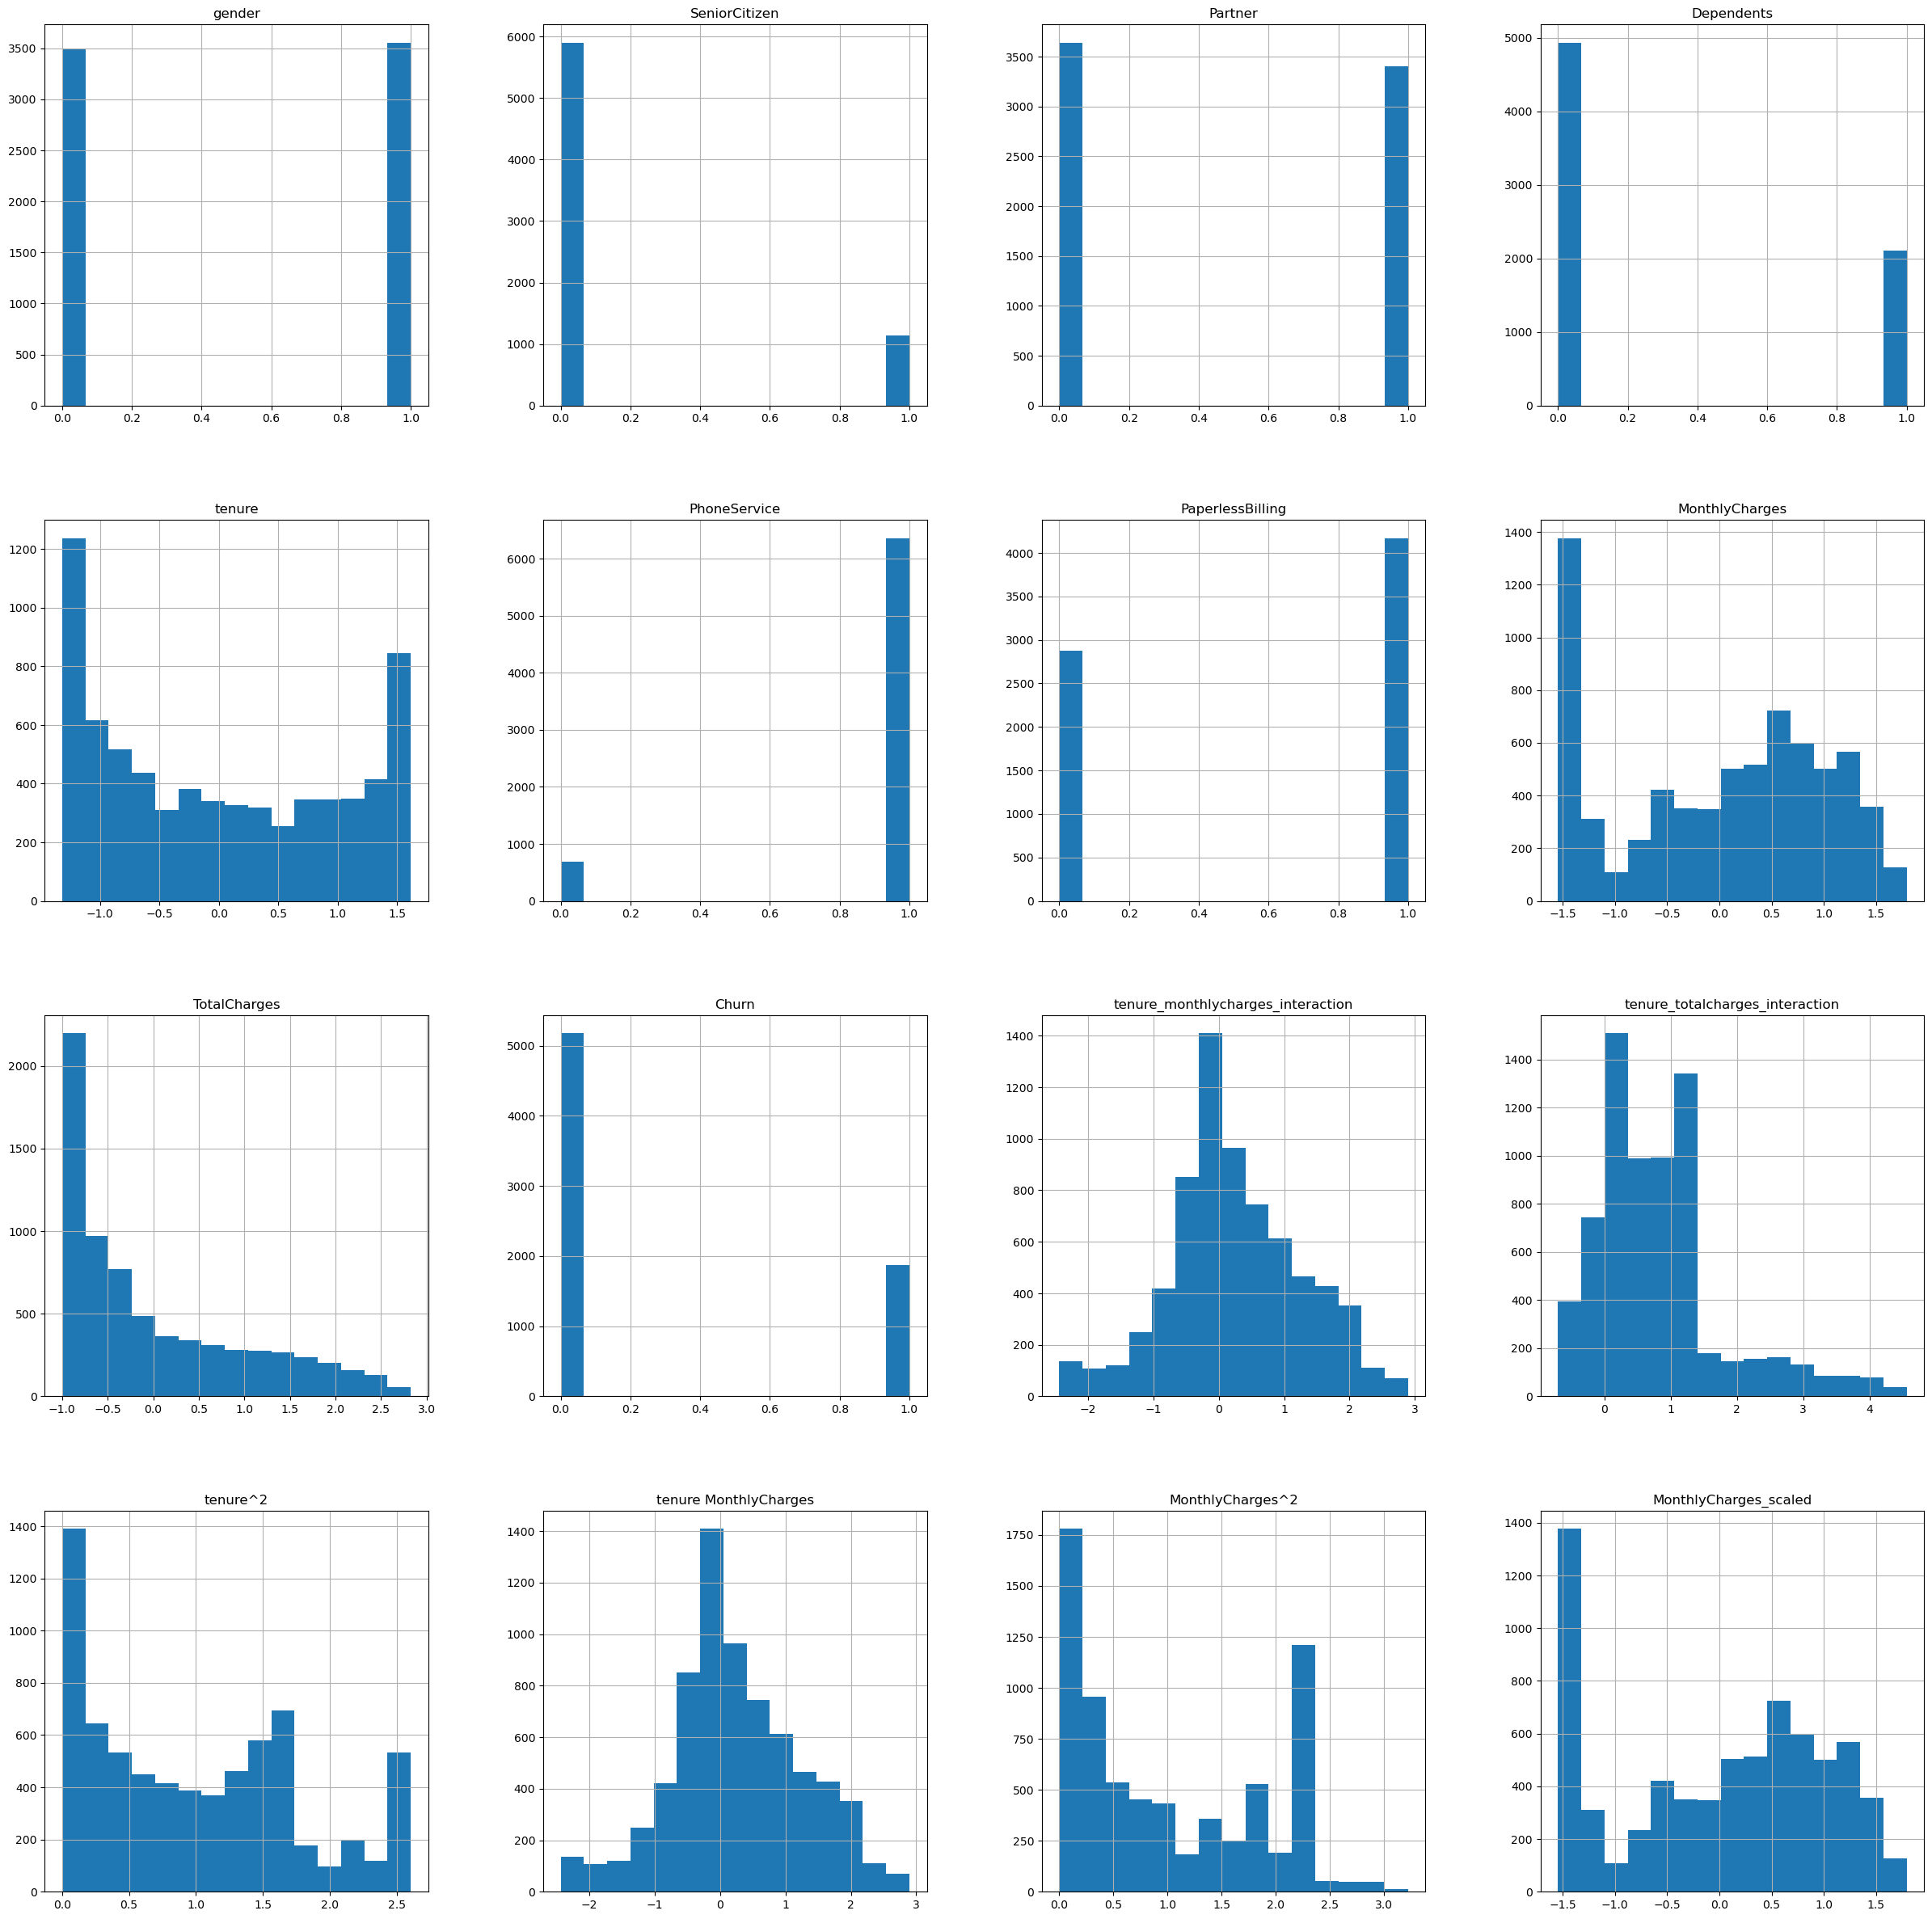

In [34]:
# Plot histograms for numerical features
df.hist(bins=15, figsize=(30, 30))
plt.show()

#### 11. Plotting Box Plot to identify Outliers

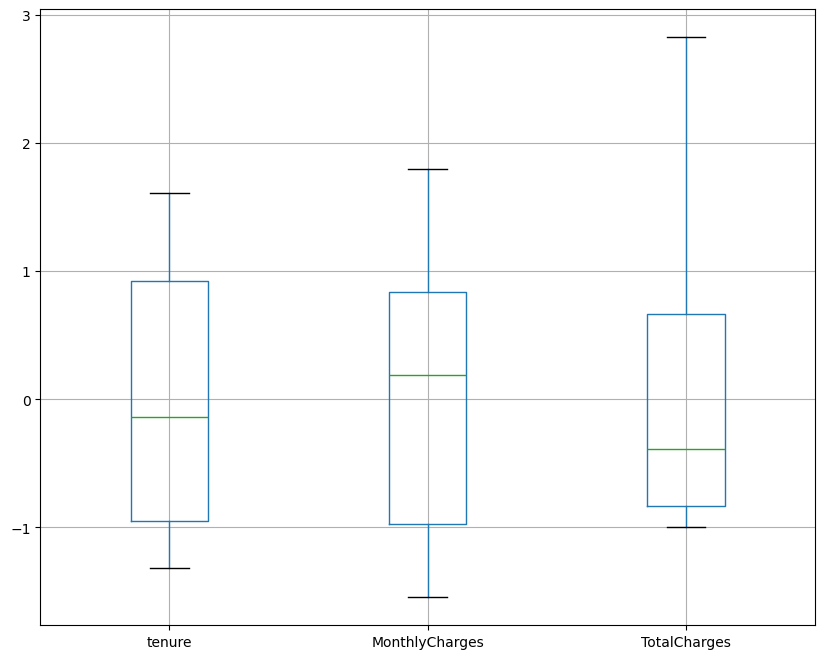

In [36]:
# Box plots for numerical variables to identify outliers
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # example numerical columns
fig, ax = plt.subplots(figsize=(10, 8))
df.boxplot(column=numerical_cols)
plt.show()

#### 12. Visualize the Distribution of 'tenure_bins'

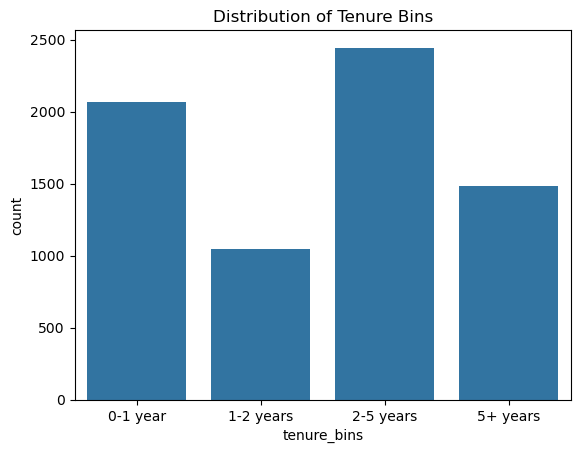

In [38]:
sns.countplot(x='tenure_bins', data=df)
plt.title('Distribution of Tenure Bins')
plt.show()

#### 13. Scatter plot to visualize Relationships

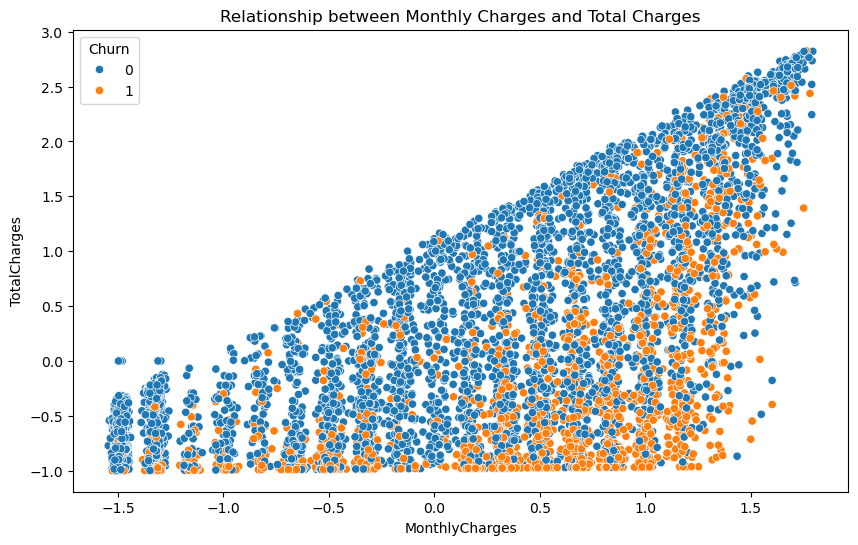

In [40]:
# Scatter plot between 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn')
plt.title('Relationship between Monthly Charges and Total Charges')
plt.show()

### Data Correlation

In [42]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix as a DataFrame
print(correlation_matrix)

                                     gender  SeniorCitizen   Partner  \
gender                             1.000000      -0.001874 -0.001808   
SeniorCitizen                     -0.001874       1.000000  0.016479   
Partner                           -0.001808       0.016479  1.000000   
Dependents                         0.010517      -0.211185  0.452676   
tenure                             0.005106       0.016567  0.379697   
PhoneService                      -0.006488       0.008576  0.017706   
PaperlessBilling                  -0.011754       0.156530 -0.014877   
MonthlyCharges                    -0.014569       0.220173  0.096848   
TotalCharges                       0.000048       0.102395  0.318812   
Churn                             -0.008612       0.150889 -0.150448   
tenure_monthlycharges_interaction  0.008123      -0.009407  0.028032   
tenure_totalcharges_interaction    0.000454       0.049638  0.099499   
tenure^2                           0.010047      -0.016451  0.10

In [43]:
# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')

# Flatten the correlation matrix and sort by correlation values
correlation_flattened = correlation_matrix.unstack()
sorted_correlation = correlation_flattened.sort_values(kind="quicksort", ascending=False)

# Filter out self-correlations and display
sorted_correlation = sorted_correlation[sorted_correlation != 1]  # Exclude self-correlation of variables
print(sorted_correlation.head(20))  # Show top 20 correlations

MonthlyCharges_scaled              MonthlyCharges                       1.000000
MonthlyCharges                     MonthlyCharges_scaled                1.000000
tenure                             TotalCharges                         0.824757
TotalCharges                       tenure                               0.824757
tenure_totalcharges_interaction    tenure MonthlyCharges                0.721539
tenure_monthlycharges_interaction  tenure_totalcharges_interaction      0.721539
tenure MonthlyCharges              tenure_totalcharges_interaction      0.721539
tenure_totalcharges_interaction    tenure_monthlycharges_interaction    0.721539
                                   tenure^2                             0.701478
tenure^2                           tenure_totalcharges_interaction      0.701478
MonthlyCharges                     TotalCharges                         0.650468
TotalCharges                       MonthlyCharges                       0.650468
                            

#### Correlation Heatmap

In [45]:
df.drop(['tenure_bins'], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

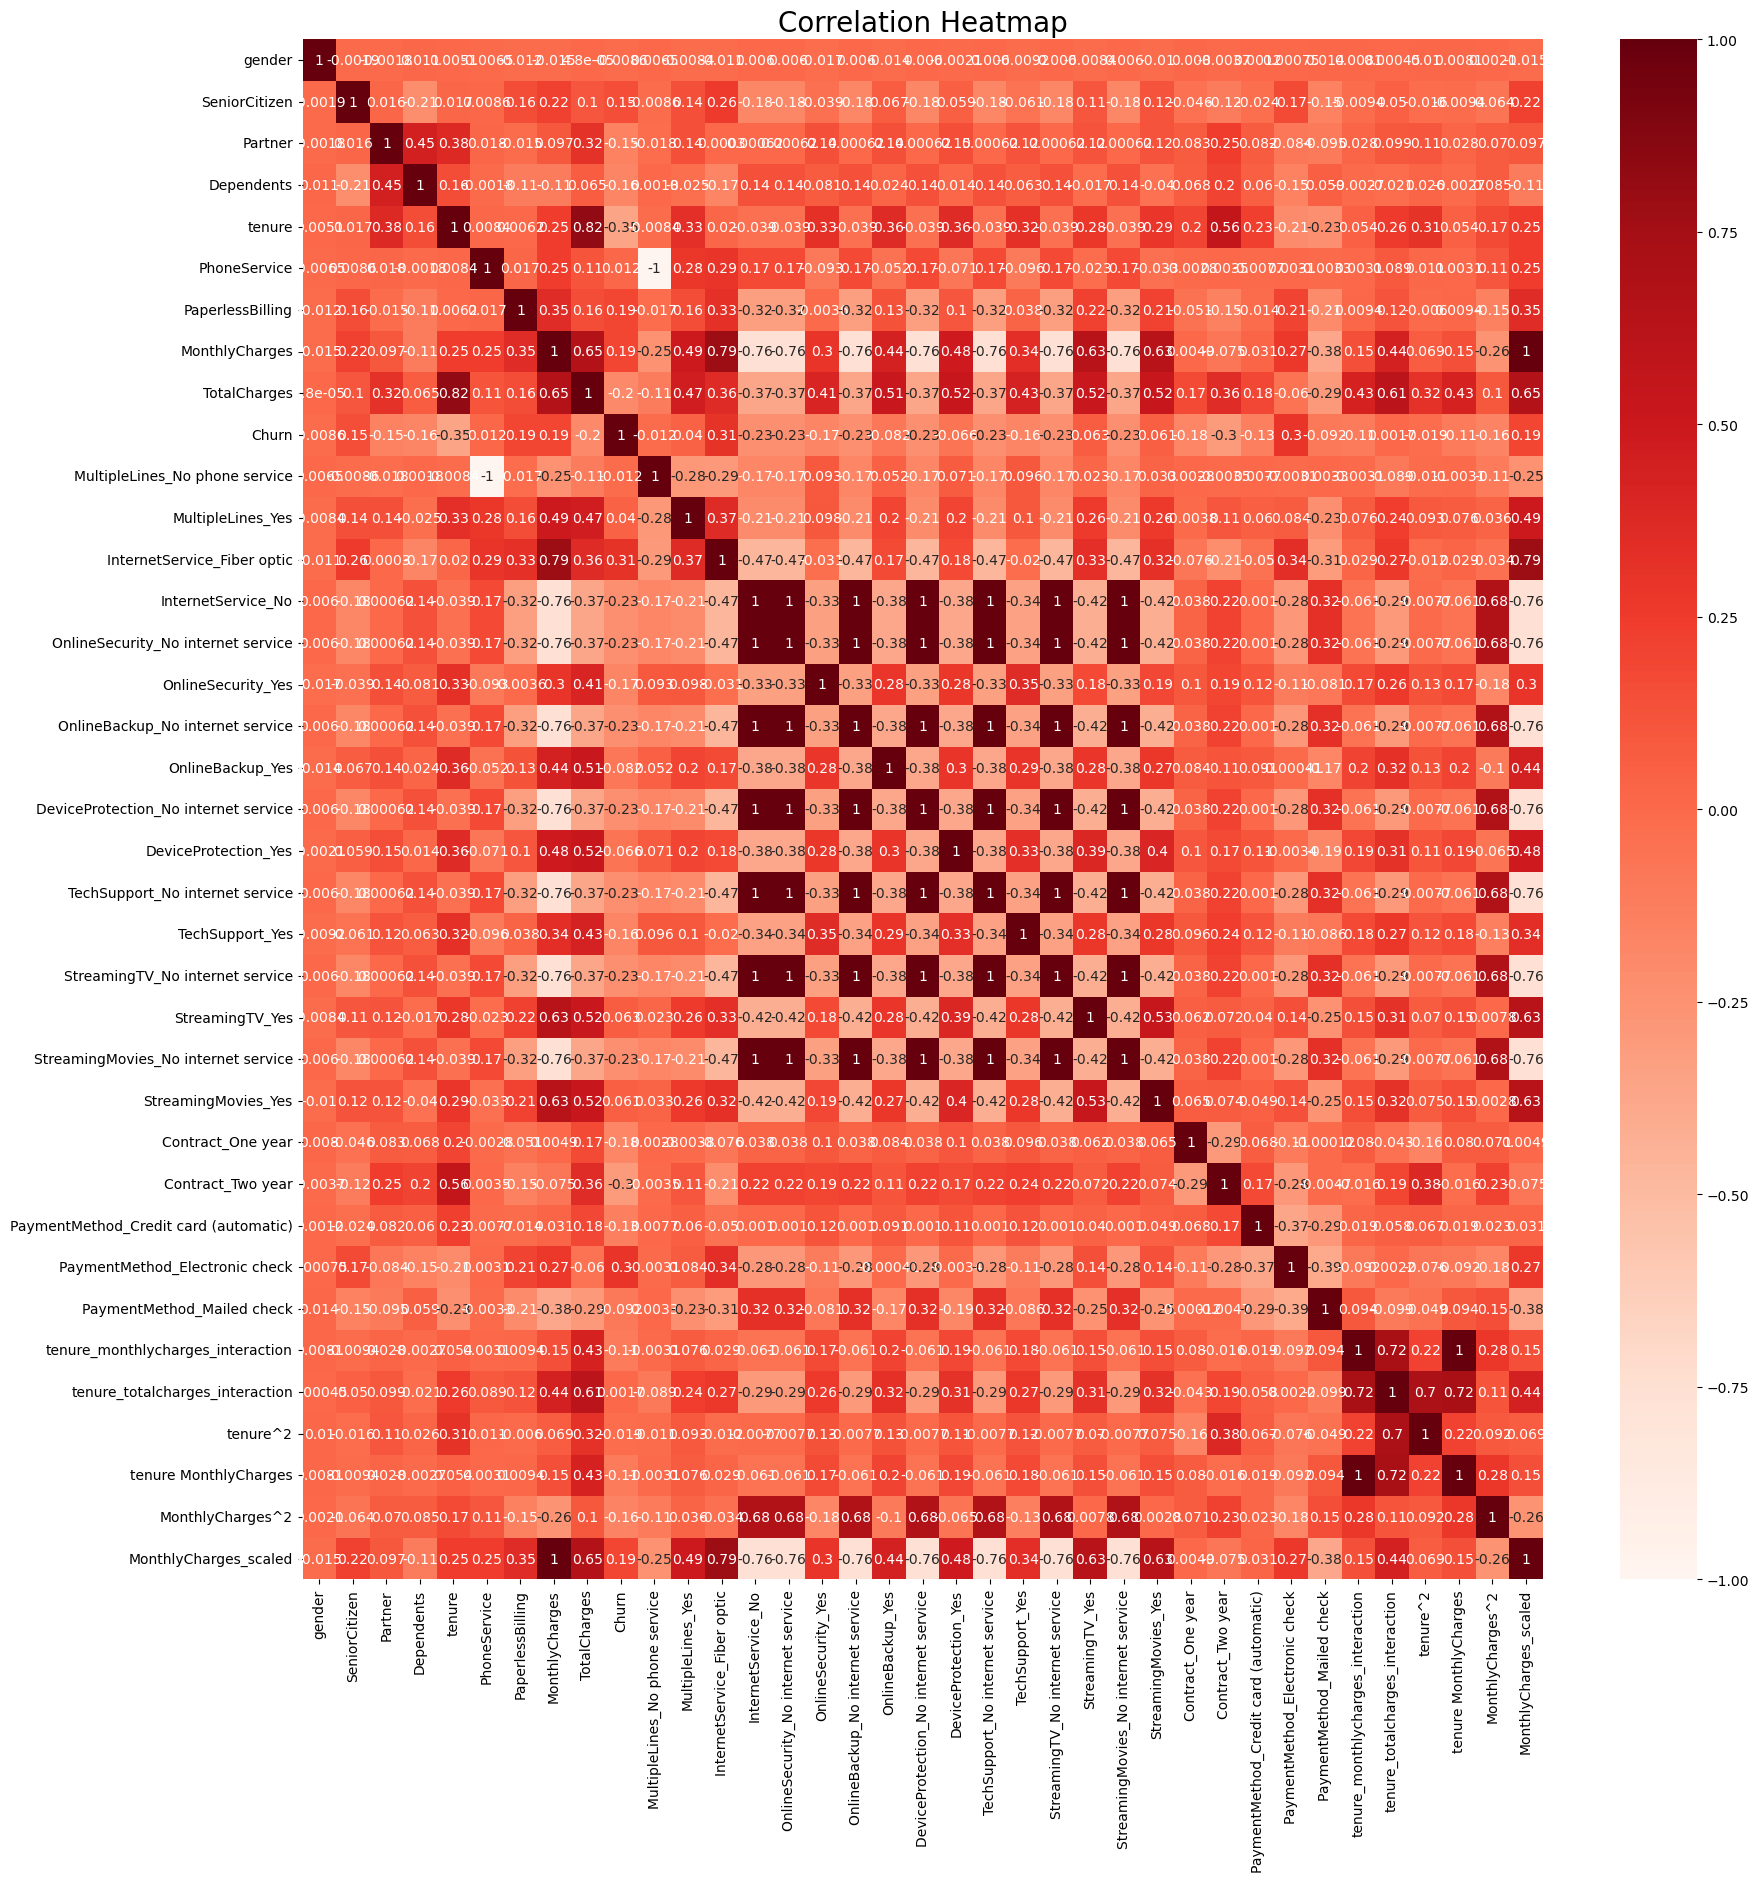

In [46]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [47]:
df.to_csv('Preprocessed_data.csv', index=False)